# 1 Feature Engineering

1. <b>Feature Extraction</b> - Transforming raw data into features suitable for modeling. Example- for text data, we use BOW or TF-IDF, for images we can use SIFT, CNN

2. <b>Feature Transformation</b> - Transforming features to improve the accuracy of the algorithm. Example: Normalization, Standardization, handeling missing values, etc..

3. <b>Feature Selection</b> - Removing unnecessary features

## 1.1 Feature Extraction

### Text Data

Text Analysis is a major application field for machine learning algorithms. However the raw data, a sequence of symbols cannot be fed directly to the algorithms themselves as most of them expect numerical feature vectors with a fixed size rather than the raw text documents with variable length.
    
We call vectorization the general process of turning a collection of text documents into numerical feature vectors. This specific strategy (tokenization, counting and normalization) is called the Bag of Words or "Bag of n-grams" representation. Documents are described by word occurrences while completely ignoring the relative position information of the words in the document.

We will use CountVectorizer to "convert text into a matrix of token counts".

BAG OF WORDS:<br />
https://machinelearningmastery.com/gentle-introduction-bag-words-model/

TF-IDF:<br />
https://www.commonlounge.com/discussion/99e86c9c15bb4d23a30b111b23e7b7b1

CODE EXAMPLE:<br />
https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/

In [21]:
# Bag of Words

from sklearn.feature_extraction.text import CountVectorizer

# Lets create 'lst_text' that will contain four doucuments
lst_text=['it was the best of times','it was the worst of times',\
          'it was the age of wisdom','it was the age of foolishness']

# Initialize the "CountVectorizer" object, which is scikit-learn's
# bag of words tool.
vocab = CountVectorizer()

# fit_transform() does two functions: First, it fits the model
# and learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of 
# strings.
dtm = vocab.fit_transform(lst_text)

# fit_transform() could be done seperatly as mentioned below
# vocab.fit(lst_text)
# dtm = vocab.transform(lst_text)

In [10]:
# We can look at unoque words by using 'vocabulary_'

vocab.vocabulary_

{'it': 3,
 'was': 7,
 'the': 5,
 'best': 1,
 'of': 4,
 'times': 6,
 'worst': 9,
 'age': 0,
 'wisdom': 8,
 'foolishness': 2}

In [11]:
# Observe that the type of dtm is sparse

print(type(dtm))

<class 'scipy.sparse.csr.csr_matrix'>


In [14]:
# Lets now print the  shape of this dtm

print(dtm.shape)

# o/p -> (4, 10)
# i.e -> 4 documents and 10 unique words

(4, 10)


In [15]:
# Lets look at the dtm

print(dtm)

# Remember that dtm is a sparse matrix. i.e. zeros wont be stored
# Lets understand First line of output -> (0,6)    1
# Here (0, 6) means 0th document and 6th(index starting from 1) unique word. 
# (we have total 4 documents) & (we have total 10 unique words)
# (0, 6)    1 -> 1 here refers to the number of occurence of 6th word
# Now lets read it all in english.
# (0, 6)    1 -> 'times' occurs 1 time in 0th document. 
# Try to observe -> (3, 3)   1

  (0, 6)	1
  (0, 4)	1
  (0, 1)	1
  (0, 5)	1
  (0, 7)	1
  (0, 3)	1
  (1, 9)	1
  (1, 6)	1
  (1, 4)	1
  (1, 5)	1
  (1, 7)	1
  (1, 3)	1
  (2, 8)	1
  (2, 0)	1
  (2, 4)	1
  (2, 5)	1
  (2, 7)	1
  (2, 3)	1
  (3, 2)	1
  (3, 0)	1
  (3, 4)	1
  (3, 5)	1
  (3, 7)	1
  (3, 3)	1


In [16]:
# Since the dtm is sparse, lets convert it into numpy array.

print(dtm.toarray())

[[0 1 0 1 1 1 1 1 0 0]
 [0 0 0 1 1 1 1 1 0 1]
 [1 0 0 1 1 1 0 1 1 0]
 [1 0 1 1 1 1 0 1 0 0]]


In [17]:
# 2-grams

vocab = CountVectorizer(ngram_range=[1,2])

dtm = vocab.fit_transform(lst_text)

In [18]:
print(vocab.vocabulary_)

{'it': 5, 'was': 16, 'the': 11, 'best': 2, 'of': 7, 'times': 15, 'it was': 6, 'was the': 17, 'the best': 13, 'best of': 3, 'of times': 9, 'worst': 19, 'the worst': 14, 'worst of': 20, 'age': 0, 'wisdom': 18, 'the age': 12, 'age of': 1, 'of wisdom': 10, 'foolishness': 4, 'of foolishness': 8}


In [20]:
print(dtm.toarray()) 

# convert sparse matrix to nparray

[[0 0 1 1 0 1 1 1 0 1 0 1 0 1 0 1 1 1 0 0 0]
 [0 0 0 0 0 1 1 1 0 1 0 1 0 0 1 1 1 1 0 1 1]
 [1 1 0 0 0 1 1 1 0 0 1 1 1 0 0 0 1 1 1 0 0]
 [1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 0 1 1 0 0 0]]


<b>Observations:</b>
<ul>
    <li> <code>vect.fit(lst_text)</code> <b>learns the vocabulary</b>
    <li> <code>vect.transform(lst_text)</code> <b>uses the fitted vocabulary</b> to build a <b>document-term matrix</b>
</ul>

In [22]:
# TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer

# list of text documents
lst_text=['It was the best of times','it was the worst of times',\
          'it was the age of wisdom','it was the age of foolishness']

vectorizer = TfidfVectorizer()

dtm = vectorizer.fit_transform(lst_text)

In [23]:
print(vectorizer.vocabulary_)

{'it': 3, 'was': 7, 'the': 5, 'best': 1, 'of': 4, 'times': 6, 'worst': 9, 'age': 0, 'wisdom': 8, 'foolishness': 2}


In [25]:
print(dtm.toarray()) 

# convert sparse matrix to nparray

[[0.         0.60735961 0.         0.31694544 0.31694544 0.31694544
  0.4788493  0.31694544 0.         0.        ]
 [0.         0.         0.         0.31694544 0.31694544 0.31694544
  0.4788493  0.31694544 0.         0.60735961]
 [0.4788493  0.         0.         0.31694544 0.31694544 0.31694544
  0.         0.31694544 0.60735961 0.        ]
 [0.4788493  0.         0.60735961 0.31694544 0.31694544 0.31694544
  0.         0.31694544 0.         0.        ]]


## 1.2 Feature Transformation

1. <b>Handling Missing values and Outliers</b>

2. <b>Normalization</b> (also known as Min-Max Scaling)

3. <b>Standardization</b> (Standard Scaling OR Z-score normalization)

<b>NOTE: </b>Transformation of the data from different scale to a common scale is referred as **"Data Normalization" or "Data Standardization"**. There are some drawbacks of using 'Normalization' as it consider the data to range between 0 and 1.

### 1.2.1 Handling Missing Values & Outliers

MISSING VALUES:<br />
<code>sklearn.preprocessing.Imputer()</code><br />
http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Imputer.html<br />

HANDLING OUTLIERS:<br />
https://www.analyticsvidhya.com/blog/2016/01/guide-data-exploration/

### 1.2.2 Normalization

In [30]:
# Lets have a look on how reshape function works

# importing numpy
import numpy as np

# creating a numpy array
a = np.array([[1,2,3],[4,5,6]])

print(a)

# We have an array of shape (2, 3) i.e. 2 rows and 3 columns.

[[1 2 3]
 [4 5 6]]


In [27]:
# Lets reshape it to (1, 6)

print(a.reshape(6))

[1 2 3 4 5 6]


In [28]:
# Now reshaping it to (3, 2)

print(a.reshape(3,-1))

[[1 2]
 [3 4]
 [5 6]]


In [32]:
# NORMALIZATION

import numpy as np

# Here we built a nparray with float data type, which is a column array.
data = np.array([1,1,0,-1,2,1,3,-2,4,100], dtype='f').reshape(-1,1)

# Lets now have a look at the data
print(data)

[[  1.]
 [  1.]
 [  0.]
 [ -1.]
 [  2.]
 [  1.]
 [  3.]
 [ -2.]
 [  4.]
 [100.]]


In [33]:
# for performing Normalization we have to import MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

MinMaxScaler().fit_transform(data)

array([[0.02941177],
       [0.02941177],
       [0.01960784],
       [0.00980392],
       [0.03921569],
       [0.02941177],
       [0.04901961],
       [0.        ],
       [0.05882353],
       [1.0000001 ]], dtype=float32)

In [50]:
# Lets now try to put normalization formula on the array and observe the results

(data-data.min())/(data.max() - data.min())

array([[0.02941176],
       [0.02941176],
       [0.01960784],
       [0.00980392],
       [0.03921569],
       [0.02941176],
       [0.04901961],
       [0.        ],
       [0.05882353],
       [1.        ]], dtype=float32)

### 1.2.3 Standardization

In [51]:
# Standard Scaling

from sklearn.preprocessing import StandardScaler

StandardScaler().fit_transform(data)

array([[-0.3328055 ],
       [-0.3328055 ],
       [-0.36642224],
       [-0.40003896],
       [-0.2991888 ],
       [-0.3328055 ],
       [-0.26557207],
       [-0.43365568],
       [-0.23195536],
       [ 2.9952497 ]], dtype=float32)

In [13]:
# Lets now try to put standardization formula on the array and observe the results

(data-data.mean())/data.std()

array([[-0.3328055 ],
       [-0.3328055 ],
       [-0.36642224],
       [-0.40003896],
       [-0.2991888 ],
       [-0.3328055 ],
       [-0.26557207],
       [-0.43365568],
       [-0.23195536],
       [ 2.9952497 ]], dtype=float32)

## 1.3 Feature Selection

It is reasonable to say that features with low variance are worse than those with high variance. So, one can consider cutting features with variance below a certain threshold.

In [35]:
from sklearn.feature_selection import VarianceThreshold

from sklearn.datasets import make_classification

# generate a ndarray of size (100, 20)
x_data_generated, y_data_generated = make_classification()

x_data_generated.shape
# (100, 20) -> Like 100 data points with 20 features.

(100, 20)

In [36]:
type(x_data_generated)

numpy.ndarray

In [37]:
VarianceThreshold(0.7).fit_transform(x_data_generated).shape

# There is 1 feature with variance lower than 0.7

(100, 19)

In [38]:
VarianceThreshold(0.8).fit_transform(x_data_generated).shape

# There are 3 feature with variance lower than 0.8

(100, 17)

In [39]:
VarianceThreshold(0.9).fit_transform(x_data_generated).shape

# There are 4 feature with variance lower than 0.9

(100, 16)

![title](image/1.png)

In [42]:
# https://chrisalbon.com/machine_learning/feature_selection/variance_thresholding_for_feature_selection/

from sklearn import datasets
from sklearn.feature_selection import VarianceThreshold

# Load iris data
iris = datasets.load_iris()

print(type(iris))

<class 'sklearn.utils.Bunch'>


In [47]:
# Create features and target
X = iris.data
y = iris.target

print('Shape: ', X.shape) # We have 150 data points and 4 features
print('Head:')
print(X[0:5]) # Lets look at first 5 data points (nparray slicing concept)
print('Std Deviation: ', X.std(axis=0)) # Std Deviation of each feature

Shape:  (150, 4)
Head:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
Std Deviation:  [0.82530129 0.43214658 1.75852918 0.76061262]


Note that,
\begin{align}
Std Deviation & = \sqrt{Variance}
\end{align}

In [48]:
# Create VarianceThreshold object with a variance with a threshold of 0.5
thresholder = VarianceThreshold(threshold=.5)

# Conduct variance thresholding
X_high_variance = thresholder.fit_transform(X)

In [51]:
print(X_high_variance.shape)

# Observe that the row with variance lower than 0.5 is removed

(150, 3)


In [50]:
# View first five rows with features with variances above threshold
print(X_high_variance[0:5])

[[5.1 1.4 0.2]
 [4.9 1.4 0.2]
 [4.7 1.3 0.2]
 [4.6 1.5 0.2]
 [5.  1.4 0.2]]


<b>Observations: </b>(Very Important)
1. If variables represent different physical quantities their scaling can be different. By changing units (e.g. from measuring distance in kilometers to measuring distance in nanometers) you can change the scaling of a variable arbitrarily.

2. If the variance is zero, it means that the feature is constant and will not improve the performance of the model. In that case, it should be removed. Or if only a handful of observations differ from a constant value, the variance will also be very low.

3. If there is high correlation between 2 features then you would discard one of them. 

4. The features that are removed because of low variance have very low variance, that would be near to zero. You should always perform all the tests with existing data before discarding any features. 

## 1.4 Pearson Correlation

<code>from scipy.stats import pearsonr</code>

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [53]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [54]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

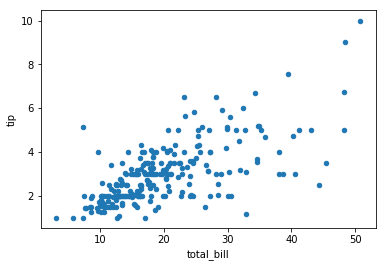

In [55]:
tips.plot(kind='scatter', x='total_bill', y='tip') ;
plt.show()

c:\users\kanav\appdata\local\programs\python\python36-32\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
c:\users\kanav\appdata\local\programs\python\python36-32\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


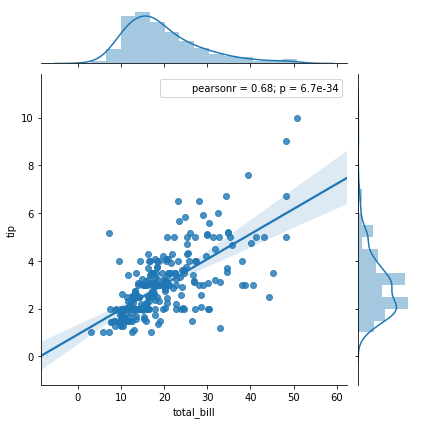

In [56]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='reg')

In [7]:
x = tips['total_bill']
y = tips['tip']

r,p = pearsonr(x,y)
print('Coefficient: ', r)
print('p-value: ',p)

Coefficient:  0.6757341092113643
p-value:  6.692470646864041e-34


## 1.5 Test for Normality
https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/

In statistical analysis, it is always important to be as percise as possible in our language. In general for a normality test, we are testing the null-hypothesis that the our 1D data is sampled from a population that has a Normal Distribution. We assume a significance level of 0.05 or 95% for our tests unless otherwise stated.

### 1.5.1 Shapiro Wilk

The Shapiro-Wilk normality test is reputadely more well suited to smaller datasets.

<code>shapiro(data)</code> this function returns (test-stat (W), p-value)

Type of <b>data</b>: Univariate, Continuous

If W=1, data is normally distributed.<br />
If W<1, signifies the difference from normal distribution.

<b>NOTE:</b> Other tests are: KS Test and Anderson-Darling test. One graphical method to test normality is QQ-plot

In [62]:
from scipy.stats import shapiro
data = np.array([1,1,0,-1,2,1,3,-2,4,100], dtype='f').reshape(-1,1)
stat, p = shapiro(data)
print('Test Stat: %.3f, p-value: %.3f' % (stat, p))
# returns (Test-statistics, p-value)

Test Stat: 0.420, p-value: 0.000


In [63]:
# Lets now try to perform Shapiro-Wilk test on Normalized data

from sklearn.preprocessing import MinMaxScaler
shapiro(MinMaxScaler().fit_transform(data))

(0.41953399777412415, 4.197331406885496e-07)

In [64]:
# Lets now try to perform Shapiro-Wilk test on Standardized data

from sklearn.preprocessing import StandardScaler
shapiro(StandardScaler().fit_transform(data))

(0.41953399777412415, 4.197331406885496e-07)

<b>Observations: </b>
1. Since our p-value is much less than our Test Statistic, we have good evidence to not reject the null hypothesis.

2. Since Test-Stat(W) = 0.419, we can say that the data is not normally distributed

3. Normalizing and Standardizing the data didn't changed the distribution.

### 1.5.2 QQ Plot

In statistics, a Q–Q plot is a probability plot, which is a graphical method for comparing two probability distributions by plotting their quantiles against each other.     
It helps us in understanding whether two random variables belong from same distribution.                         
If the two distributions being compared are similar, the points in the Q–Q plot will approximately lie on the line y = x.

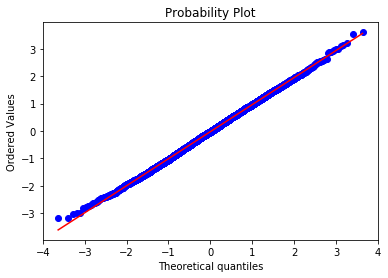

In [66]:
import numpy as np
import pylab
import scipy.stats as stats

std_normal = np.random.normal(0,1,5000)

stats.probplot(std_normal, dist='norm', plot=pylab)

pylab.show()

In [67]:
shapiro(std_normal)

# Since Test-Stat(W) = 0.999, we can say that the distribution is normal

(0.9994972348213196, 0.20866595208644867)

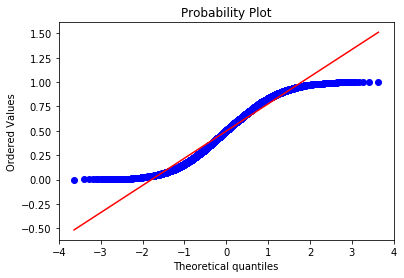

In [68]:
data = np.random.random((5000))

stats.probplot(data, dist='norm', plot=pylab)

pylab.show()

In [69]:
shapiro(data)

# Since Test-Stat(W) = 0.419, we can say that the distribution is not normal

(0.9579062461853027, 9.163690907219769e-36)

## p-value

https://www.youtube.com/watch?v=-MKT3yLDkqk